<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

In [19]:
missing_data = df1.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Respondent
False    731
Name: Respondent, dtype: int64

MainBranch
False    731
Name: MainBranch, dtype: int64

Hobbyist
False    731
Name: Hobbyist, dtype: int64

OpenSourcer
False    731
Name: OpenSourcer, dtype: int64

OpenSource
False    719
True      12
Name: OpenSource, dtype: int64

Employment
False    731
Name: Employment, dtype: int64

Country
False    731
Name: Country, dtype: int64

Student
False    727
True       4
Name: Student, dtype: int64

EdLevel
False    721
True      10
Name: EdLevel, dtype: int64

UndergradMajor
False    686
True      45
Name: UndergradMajor, dtype: int64

EduOther
False    726
True       5
Name: EduOther, dtype: int64

OrgSize
False    720
True      11
Name: OrgSize, dtype: int64

DevType
False    728
True       3
Name: DevType, dtype: int64

YearsCode
False    731
Name: YearsCode, dtype: int64

Age1stCode
False    731
Name: Age1stCode, dtype: int64

YearsCodePro
False    730
True       1
Name: YearsCodePro, dtype: int64

CareerSat
False    731
Nam

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot: xlabel='ConvertedComp', ylabel='Density'>

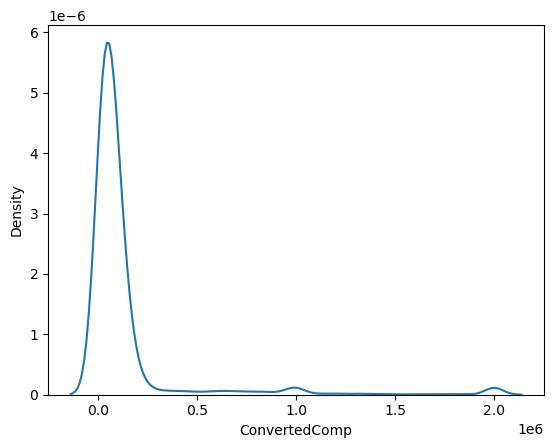

In [3]:
# your code goes here
sns.kdeplot(data=df, x="ConvertedComp")

Plot the histogram for the column `ConvertedComp`.


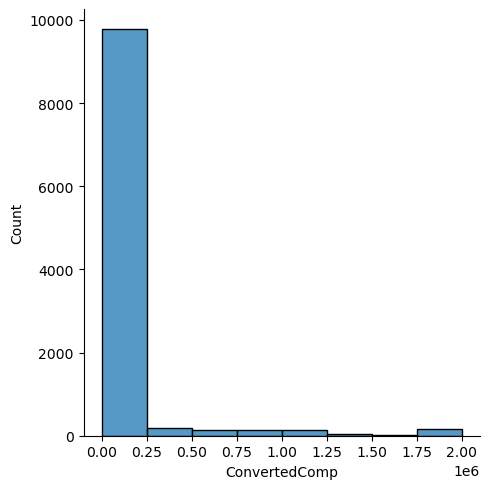

In [4]:
# your code goes here
sns.displot(df, x="ConvertedComp", bins=8)

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

###### Answer: "10480 responders that identified themselves only as a Man"

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
df1=df.loc[df["Gender"]=="Woman"]
df1["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [23]:
# your code goes here
df["Age"].describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64 29.0


##### Answer: the five number summary for the column Age are 16, 25, 29, 35, 99

Plot a histogram of the column `Age`.


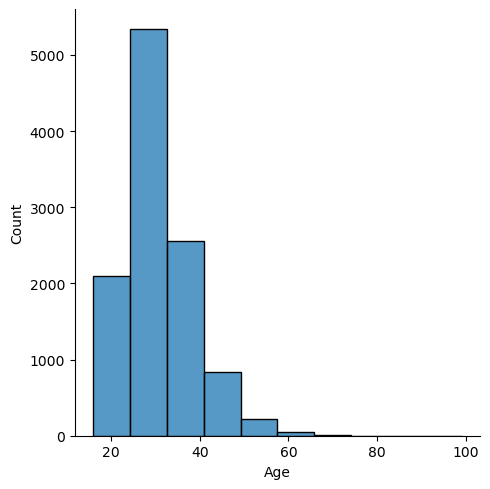

In [50]:
# your code goes here
sns.displot(df, x="Age", bins=int(83/8))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot: ylabel='ConvertedComp'>

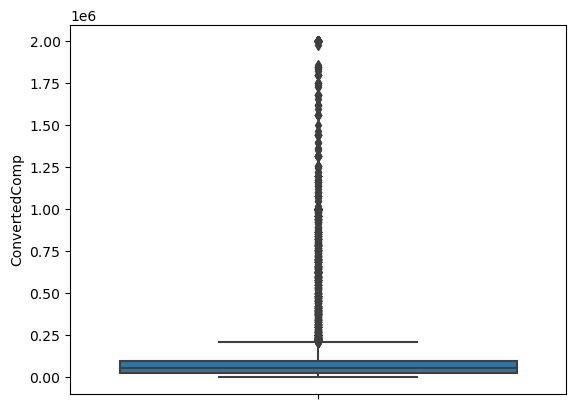

In [26]:
# your code goes here
sns.boxplot(y="ConvertedComp", data=df)

<AxesSubplot: ylabel='Age'>

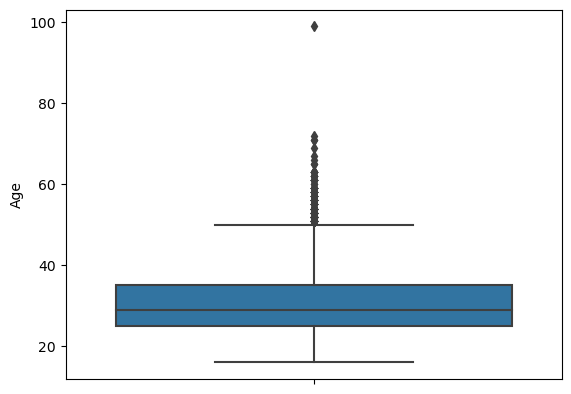

In [28]:
sns.boxplot(y="Age", data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
df["ConvertedComp"].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [12]:
IQR=1.000000e+05-2.686800e+04
print("IQR: ", IQR)

IQR:  73132.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
lower_bound= 2.686800e+04-1.5*IQR
upper_bound=1.000000e+05+1.5*IQR
print("lower bound: ", lower_bound)
print("upper bound: ", upper_bound)

lower bound:  -82830.0
upper bound:  209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
df2=df.loc[df["ConvertedComp"]>209698.0]
len(df2["ConvertedComp"])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [52]:
# your code goes here
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_out=remove_outlier(df, "ConvertedComp")
df_out["ConvertedComp"].head()

0    61000.0
1    95179.0
2    90000.0
4    65277.0
5    31140.0
Name: ConvertedComp, dtype: float64

In [37]:
df_out["ConvertedComp"].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [16]:
# your code goes here
df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
